In [289]:
import pandas as pd
report_sens = pd.read_csv('./result/report_sens.csv')
report_query = pd.read_csv('./result/report_query.csv')
report_DP = pd.read_csv('./result/report_DP.csv')
report_DP_limits = pd.read_csv('./result/report_DP_limits.csv')
queries = dict()
for qtype in ['triangle', '4path', '4cycle', '4star']:
    queries[qtype] = report_sens[report_sens['query'].str.startswith("q_%s"%qtype)]['query'].unique()

In [127]:
def gen_sens_table_latex(queries, report_sens, report_query, measure):
    tex_template = open('./result/table_sens_%s.tex.template'%measure, 'r').read()
    filler = ''
    for i in range(4):
        filler += '$s_%d$\t'%(i+1)
        for qtype in ['triangle', '4path', '4cycle', '4star']:
            for algo in ['TSens', 'Elastic']:
                val = report_sens.query('algo=="{algo}" & query=="{qname}"'.format(algo=algo, qname=queries[qtype][i]))[measure].to_list()[0]
                if measure == 'sensitivity':
                    filler += '& %s\t'%val
                elif measure == 'time':
                    filler += '& %.3f\t'%float(val)
            if measure == 'time':
                val = report_query.query('query=="{qname}"'.format(qname=queries[qtype][i]))['avg_time'].to_list()[0]
                filler += '& %.3f\t'%float(val)
        filler += '\\\\ \hline\n'
    table_tex = tex_template.replace('<filler>', filler)
    return table_tex

In [128]:
print(gen_sens_table_latex(queries, report_sens, report_query, measure='sensitivity'))

\begin{table*}[t!]
%for \Yup
%\usepackage{stmaryrd}
%for \square \sqcap
%\usepackage{mathabx}
\def\qtri{q_\triangle}
\def\qpath{q_\sqcap}
\def\qcycle{q_\square}
\def\qstar{q_\Yup}
\def\tsens{TSens}
\def\elastic{Elastic}
\begin{tabular}{|l|l|l|l|l|l|l|l|l|}
\hline
\multirow{2}{*}{setting} & \multicolumn{2}{l|}{$\qtri$} & \multicolumn{2}{l|}{$\qpath$} & \multicolumn{2}{l|}{$\qcycle$} & \multicolumn{2}{l|}{$\qstar$} \\ \cline{2-9} 
                  & \tsens    & \elastic    & \tsens    & \elastic  & \tsens    & \elastic  & \tsens    & \elastic  \\ \hline
$s_1$	& 24	& 2430	& 38610	& 155520	& 1207	& 376200	& 19	& 996480	\\ \hline
$s_2$	& 76	& 7524	& 115650	& 376200	& 906	& 225720	& 19	& 1195776	\\ \hline
$s_3$	& 76	& 7524	& 115650	& 225720	& 218	& 65610	& 29	& 14008500	\\ \hline
$s_4$	& 42	& 2880	& 30780	& 65610	& 304	& 155520	& 29	& 13018800	\\ \hline
\end{tabular}
\caption{Local sensitivity of 4 query types under 4 query settings for TSens and Elastic. $\qtri$ is a triangle query, $\qpat

In [129]:
print(gen_sens_table_latex(queries, report_sens, report_query, measure='time'))

\begin{table*}[t!]
%for \Yup
%\usepackage{stmaryrd}
%for \square \sqcap
%\usepackage{mathabx}
\def\qtri{q_\triangle}
\def\qpath{q_\sqcap}
\def\qcycle{q_\square}
\def\qstar{q_\Yup}
\def\tsens{TSens}
\def\elastic{Elastic}
\def\qtime{$Q(D)$}
\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
\multirow{2}{*}{setting} & \multicolumn{3}{l|}{$\qtri$} & \multicolumn{3}{l|}{$\qpath$} & \multicolumn{3}{l|}{$\qcycle$} & \multicolumn{3}{l|}{$\qstar$} \\ \cline{2-13} 
                  & \tsens    & \elastic    & \qtime    & \tsens    & \elastic  & \qtime    & \tsens    & \elastic  & \qtime    & \tsens    & \elastic  & \qtime    \\ \hline
$s_1$	& 0.109	& 0.004	& 0.111	& 0.215	& 0.009	& 0.164	& 0.506	& 0.008	& 0.459	& 0.311	& 0.007	& 0.175	\\ \hline
$s_2$	& 0.391	& 0.006	& 0.393	& 0.221	& 0.010	& 0.167	& 0.453	& 0.008	& 0.395	& 0.404	& 0.008	& 0.180	\\ \hline
$s_3$	& 0.440	& 0.007	& 0.391	& 0.227	& 0.010	& 0.177	& 0.115	& 0.005	& 0.132	& 0.371	& 0.059	& 0.184	\\ \hline
$s_4$	& 0.120	& 0.004	& 0.128

In [331]:
def gen_dp_table_latex(queries, report_DP, measure):
    import numpy as np
    df = report_DP.copy()
    df['time'] = df['avg_time']
    df.loc[df['nosy_ans'] < 0, 'nosy_ans'] = 0 
    #display(df.apply(lambda x: np.array(eval(x['nosy_ans_list'])).dtype , axis=1))
    #display(df.apply(lambda x: np.array(eval(x['nosy_ans_list'])) - x['true_ans'], axis=1))
    df['relerror'] = df.apply(lambda x: np.median(np.absolute(np.array(eval(x['nosy_ans_list'])) - x['true_ans']) / x['true_ans']), axis=1)
    #df['relerror'] = df.apply(lambda x: np.average(np.absolute(np.array(eval(x['nosy_ans_list'])) - x['true_ans']) / x['true_ans']), axis=1)
    #display(df['relerror'])
    tex_template = open('./result/table_dp_%s.tex.template'%measure, 'r').read()
    filler = ''
    for i in range(4):
        filler += '$s_%d$\t'%(i+1)
        for qtype in ['triangle', '4path', '4cycle', '4star']:
            for algo in ['TSensDP', 'PrivateSQL']:
                val = df.query('algo=="{algo}" & query=="{qname}"'.format(algo=algo, qname=queries[qtype][i]))[measure].to_list()[0]
                if measure == 'relerror':
                    filler += '& %.2f\\%%\t'%(float(val)*100)
                elif measure == 'time':
                    filler += '& %.3f\t'%float(val)
        filler += '\\\\ \hline\n'
    table_tex = tex_template.replace('<filler>', filler)
    return table_tex

In [332]:
print(gen_dp_table_latex(queries, report_DP, measure='relerror'))

\begin{table*}[t!]
%for \Yup
%\usepackage{stmaryrd}
%for \square \sqcap
%\usepackage{mathabx}
\def\qtri{q_\triangle}
\def\qpath{q_\sqcap}
\def\qcycle{q_\square}
\def\qstar{q_\Yup}
\def\tsensdp{TSensDP}
\def\privatesql{PrivateSQL}
\begin{tabular}{|l|l|l|l|l|l|l|l|l|}
\hline
\multirow{2}{*}{setting} & \multicolumn{2}{l|}{$\qtri$} & \multicolumn{2}{l|}{$\qpath$} & \multicolumn{2}{l|}{$\qcycle$} & \multicolumn{2}{l|}{$\qstar$} \\ \cline{2-9} 
                  & \tsensdp    & \privatesql    & \tsensdp    & \privatesql  & \tsensdp    & \privatesql  & \tsensdp    & \privatesql  \\ \hline
$s_1$	& 7.97\%	& 179.53\%	& 17.17\%	& 8.49\%	& 0.34\%	& 238.20\%	& 6.20\%	& 95015.23\%	\\ \hline
$s_2$	& 10.03\%	& 39.53\%	& 2.00\%	& 2.59\%	& 16.06\%	& 614.71\%	& 13.94\%	& 70474.03\%	\\ \hline
$s_3$	& 0.99\%	& 43.46\%	& 4.16\%	& 5.89\%	& 63.67\%	& 744.56\%	& 1.77\%	& 599589.38\%	\\ \hline
$s_4$	& 41.45\%	& 53.73\%	& 40.58\%	& 15.50\%	& 41.94\%	& 862.41\%	& 8.60\%	& 734135.53\%	\\ \hline
\end{tabular}
\capt

In [133]:
print(gen_dp_table_latex(queries, report_DP, measure='time'))

\begin{table*}[t!]
%for \Yup
%\usepackage{stmaryrd}
%for \square \sqcap
%\usepackage{mathabx}
\def\qtri{q_\triangle}
\def\qpath{q_\sqcap}
\def\qcycle{q_\square}
\def\qstar{q_\Yup}
\def\tsensdp{TSensDP}
\def\privatesql{PrivateSQL}
\begin{tabular}{|l|l|l|l|l|l|l|l|l|}
\hline
\multirow{2}{*}{setting} & \multicolumn{2}{l|}{$\qtri$} & \multicolumn{2}{l|}{$\qpath$} & \multicolumn{2}{l|}{$\qcycle$} & \multicolumn{2}{l|}{$\qstar$} \\ \cline{2-9} 
                  & \tsensdp    & \privatesql    & \tsensdp    & \privatesql  & \tsensdp    & \privatesql  & \tsensdp    & \privatesql  \\ \hline
$s_1$	& 0.246	& 0.124	& 0.932	& 1.721	& 0.692	& 1.756	& 0.476	& 0.169	\\ \hline
$s_2$	& 0.456	& 0.219	& 1.108	& 6.604	& 0.568	& 0.802	& 0.516	& 0.182	\\ \hline
$s_3$	& 0.515	& 0.223	& 1.007	& 1.790	& 0.312	& 0.163	& 0.569	& 0.628	\\ \hline
$s_4$	& 0.255	& 0.123	& 0.589	& 0.350	& 0.362	& 0.250	& 0.558	& 0.673	\\ \hline
\end{tabular}
\caption{Computation time of 4 query types under 4 query settings for TSensDP

In [325]:
def gen_dp_oracle_table_latex(queries, qtype, report_DP_limits, report_sens, measure='relerror'):
    import numpy as np
    algo = 'TSensDP'
    df = report_DP_limits.copy()
    df['time'] = df['avg_time']
    df.loc[df['nosy_ans'] < 0, 'nosy_ans'] = 0 
    df['relerror'] = df.apply(lambda x: np.median(np.absolute(np.array(eval(x['nosy_ans_list'])) - x['true_ans']) / x['true_ans']), axis=1)
    limits = sorted(df[df['query'].str.startswith("q_%s"%qtype)]['limit'].unique())
    tex_template = open('./result/table_dp_%s.tex.template'%'oracle', 'r').read()
    filler = ''
    filler += '\multirow{2}{*}{setting} & \multirow{2}{*}{LS} & \multicolumn{6}{c|}{$\ell$} \\\\ \\cline{3-8} \n&'
    for limit in limits:
        filler += '& %d\t'%limit
    filler += '\\\\ \\hline \n'
    for i in range(4):
        all_table_tstar = report_sens.query('algo=="TSens" & query=="{qname}"'.format(qname=queries[qtype][i]))['all_table_tstar'].to_list()[0]
        all_table_tstar = eval(re.sub(r'((tri_)?source.*?),', r"'\1',", all_table_tstar))
        for table_tstar in all_table_tstar:
            if table_tstar[0] == df.query('algo=="{algo}" & query=="{qname}"'.format(algo=algo, qname=queries[qtype][i]))['reln'].to_list()[0]:
                LS = table_tstar[2]
        filler += '$s_%d$ & %d\t'%(i+1, LS)
        for limit in limits:
            q = 'algo=="{algo}" & limit=="{limit}" & query=="{qname}"'.format(algo=algo, qname=queries[qtype][i], limit=limit)
            val = df.query(q)[measure].to_list()[0]
            filler += '& {val:.2f}\\%\t'.format(val=val*100)
        filler += '\\\\ \hline\n'
    table_tex = tex_template.replace('<filler>', filler).replace('<qtype>', qtype + ' queries')
    return table_tex

In [326]:
for qtype in ['triangle', '4path', '4cycle', '4star']:
    print(gen_dp_oracle_table_latex(queries, qtype, report_DP_limits, report_sens))
    print()

\begin{table*}[t!]
%for \Yup
%\usepackage{stmaryrd}
%for \square \sqcap
%\usepackage{mathabx}
\def\qtri{q_\triangle}
\def\qpath{q_\sqcap}
\def\qcycle{q_\square}
\def\qstar{q_\Yup}
\def\tsensdp{TSensDP}
\def\privatesql{PrivateSQL}
\begin{tabular}{|l|l|l|l|l|l|l|l|}
\hline
\multirow{2}{*}{setting} & \multirow{2}{*}{LS} & \multicolumn{6}{c|}{$\ell$} \\ \cline{3-8} 
&& 1	& 30	& 50	& 80	& 100	& 1000	\\ \hline 
$s_1$ & 20	& 4.72\%	& 4.60\%	& 21.48\%	& 21.19\%	& 3.72\%	& 93.80\%	\\ \hline
$s_2$ & 24	& 0.86\%	& 1.33\%	& 2.33\%	& 2.28\%	& 2.92\%	& 6.77\%	\\ \hline
$s_3$ & 50	& 0.78\%	& 1.36\%	& 1.15\%	& 1.85\%	& 2.09\%	& 17.02\%	\\ \hline
$s_4$ & 42	& 2.50\%	& 8.91\%	& 3.66\%	& 8.60\%	& 23.68\%	& 23.08\%	\\ \hline
\end{tabular}
\caption{Relative error of triangle queries under 4 query settings across different esitmated tuple sensitivity bound $\ell$ for TSensDP. The corresponding local sensitivity is shown for each query.}
\end{table*}

\begin{table*}[t!]
%for \Yup
%\usepackage{stmaryrd}
%for 

In [337]:
def gen_dp_oracle2_table_latex(queries, qtype, report_DP_limits, report_sens, measure='relerror'):
    import numpy as np
    algo = 'TSensDP'
    df = report_DP_limits.copy()
    df['time'] = df['avg_time']
    df.loc[df['nosy_ans'] < 0, 'nosy_ans'] = 0 
    df['relerror'] = df.apply(lambda x: np.median(np.absolute(np.array(eval(x['nosy_ans_list'])) - x['true_ans']) / x['true_ans']), axis=1)
    df['relbias'] = df.apply(lambda x: np.median(np.absolute(np.array(eval(x['bias_ans_list'])) - x['true_ans']) / x['true_ans']), axis=1)
    df['gsens'] = df.apply(lambda x: np.median(eval(x['gsens_list'])), axis=1)
    limits = sorted(df[df['query'].str.startswith("q_%s"%qtype)]['limit'].unique())
    tex_template = open('./result/table_dp_%s.tex.template'%'oracle2', 'r').read()
    filler = ''
    filler += '\multirow{3}{*}{setting} & \multirow{3}{*}{LS} & \multicolumn{18}{c|}{$\ell$} \\\\ \\cline{3-20} \n&'
    for limit in limits:
        filler += '& \multicolumn{3}{c|}{%d}\t'%limit
    filler += '\\\\ \\cline{3-20} \n&'
    for limit in limits:
        filler += '& GS & Bias & Err '
    filler += '\\\\ \\hline \n'
    for i in range(4):
        all_table_tstar = report_sens.query('algo=="TSens" & query=="{qname}"'.format(qname=queries[qtype][i]))['all_table_tstar'].to_list()[0]
        all_table_tstar = eval(re.sub(r'((tri_)?source.*?),', r"'\1',", all_table_tstar))
        for table_tstar in all_table_tstar:
            if table_tstar[0] == df.query('algo=="{algo}" & query=="{qname}"'.format(algo=algo, qname=queries[qtype][i]))['reln'].to_list()[0]:
                LS = table_tstar[2]
        filler += '$s_%d$ & %d\t'%(i+1, LS)
        for limit in limits:
            q = 'algo=="{algo}" & limit=="{limit}" & query=="{qname}"'.format(algo=algo, qname=queries[qtype][i], limit=limit)
            val = df.query(q)[['gsens', 'relbias', 'relerror']].iloc[0]
            filler += '& {GS} &{bias:.2f}\\% & {err:.2f}\\%\t'.format(GS=val['gsens'], bias=val['relbias']*100, err=val['relerror']*100)
        filler += '\\\\ \hline\n'
    table_tex = tex_template.replace('<filler>', filler).replace('<qtype>', qtype + ' queries')
    return table_tex

In [338]:
for qtype in ['triangle', '4path', '4cycle', '4star']:
    print(gen_dp_oracle2_table_latex(queries, qtype, report_DP_limits, report_sens))
    print()

\begin{table*}[t!]
\tiny
%for \Yup
%\usepackage{stmaryrd}
%for \square \sqcap
%\usepackage{mathabx}
\def\qtri{q_\triangle}
\def\qpath{q_\sqcap}
\def\qcycle{q_\square}
\def\qstar{q_\Yup}
\def\tsensdp{TSensDP}
\def\privatesql{PrivateSQL}
\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline
\multirow{3}{*}{setting} & \multirow{3}{*}{LS} & \multicolumn{18}{c|}{$\ell$} \\ \cline{3-20} 
&& \multicolumn{3}{c|}{1}	& \multicolumn{3}{c|}{30}	& \multicolumn{3}{c|}{50}	& \multicolumn{3}{c|}{80}	& \multicolumn{3}{c|}{100}	& \multicolumn{3}{c|}{1000}	\\ \cline{3-20} 
&& GS & Bias & Err & GS & Bias & Err & GS & Bias & Err & GS & Bias & Err & GS & Bias & Err & GS & Bias & Err \\ \hline 
$s_1$ & 20	& 13.0 &5.48\% & 4.72\%	& 18.5 &0.00\% & 4.60\%	& 11.0 &18.87\% & 21.48\%	& 12.5 &10.36\% & 21.19\%	& 33.0 &0.00\% & 3.72\%	& 6.5 &55.45\% & 93.80\%	\\ \hline
$s_2$ & 24	& 22.5 &0.22\% & 0.86\%	& 21.0 &2.14\% & 1.33\%	& 41.0 &0.22\% & 2.33\%	& 22.0 &1.07\% & 2.28\%	& 34.5 &1.07\% & 2.92\%	& 192.

In [281]:
def append_ls(report_DP, report_sens):
    df = report_DP.copy()
    
    def find_LS(row):
        qname = row['query']
        reln = row['reln']
        all_table_tstar = report_sens.query('algo=="TSens" & query=="{qname}"'.format(qname=qname))['all_table_tstar'].to_list()[0]
        all_table_tstar = eval(re.sub(r'((tri_)?source.*?),', r"'\1',", all_table_tstar))
        for table_tstar in all_table_tstar:
            if table_tstar[0] == reln:
                LS = table_tstar[2]
        return LS
    df['LS'] = df.apply(lambda row: find_LS(row), axis=1)
    return df

In [288]:
with pd.option_context("display.max_rows", 100000, "display.width", 100000000, 'display.expand_frame_repr', False):
    display(append_ls(report_DP_limits, report_sens).query('algo=="TSensDP"')[['algo', 'query', 'limit', 'nosy_ans_list', 'bias_ans_list', 'gsens_list', 'LS']])

,algo,query,limit,nosy_ans_list,bias_ans_list,gsens_list,LS
0,TSensDP,q_4star_9880d9,1,"[1320.8189312572729, 1326.0288986775504, 1240....","[1328.0, 1328.0, 1328.0, 1328.0, 1328.0, 1328....","[15, 21, 15, 15, 15, 21, 14, 15, 22, 18]",19
1,TSensDP,q_4star_9880d9,10,"[1165.7647760733341, 1329.846998068116, 1310.3...","[1328.0, 1328.0, 1238.0, 1076.0, 980.0, 1328.0...","[47, 17, 14, 12, 11, 19, 17, 15, 19, 21]",19
2,TSensDP,q_4star_9880d9,30,"[566.4872526290084, 2.7578601251022934, 1064.8...","[570.0, 4.0, 1076.0, 1328.0, 1238.0, 192.0, 13...","[8, 1, 12, 17, 14, 5, 110, 7, 19, 97]",19
3,TSensDP,q_4star_9880d9,50,"[1229.397928139787, 1305.2319327576263, 1261.2...","[1328.0, 1328.0, 1328.0, 980.0, 1238.0, 1328.0...","[16, 15, 36, 11, 14, 23, 10, 36, 1, 11]",19
4,TSensDP,q_4star_9880d9,100,"[385.02482247708605, 1314.2655663759624, 1255....","[426.0, 1328.0, 1328.0, 4.0, 980.0, 4.0, 122.0...","[7, 15, 23, 1, 11, 1, 4, 68, 1, 1]",19
5,TSensDP,q_4star_9880d9,1000,"[4.247658607349736, -5.467138189874751, 1490.8...","[4.0, 4.0, 1328.0, 4.0, 4.0, 4.0, 4.0, 1328.0,...","[1, 1, 61, 1, 1, 1, 1, 203, 1019, 135]",19
6,TSensDP,q_4cycle_c5003f,10,"[78874.5038819705, 77253.07581110953, 79437.34...","[78731.0, 77072.0, 78847.0, 78731.0, 77072.0, ...","[114, 104, 116, 115, 105, 114, 113, 103, 109, ...",122
7,TSensDP,q_4cycle_c5003f,100,"[76734.13847780864, 75386.40427077796, 71292.4...","[76555.0, 75548.0, 71499.0, 79207.0, 78965.0, ...","[102, 98, 90, 123, 119, 131, 107, 152, 100, 112]",122
8,TSensDP,q_4cycle_c5003f,500,"[75026.32823530048, 78375.31316910929, 77944.0...","[74960.0, 79207.0, 79207.0, 22232.0, 74475.0, ...","[97, 320, 220, 49, 96, 131, 294, 75, 87, 121]",122
9,TSensDP,q_4cycle_c5003f,1000,"[78844.30900815268, 79168.30435679149, 33005.8...","[79207.0, 79207.0, 32855.0, 79207.0, 39535.0, ...","[321, 715, 57, 1369, 61, 264, 258, 1379, 98, 327]",122


In [260]:
report_sens

,algo,arch,scale,query,time,relation,tuple,sensitivity,all_table_tstar,time_list,test pass
0,TSens,snap_facebook,1,q_4star_9880d9,0.311,source_686_circle_circle12,"[('c', '823'), ('b', '828')]",19,"[(source_686_circle_circle12, [('c', '823'), (...","[0.3567476272583008, 0.32691192626953125, 0.31...",Succeeded
1,Elastic,snap_facebook,1,q_4star_9880d9,0.007,source_686_circle_circle12,"[('C', '828'), ('B', '747')]",996480,"[(source_686_circle_circle12, [('C', '828'), (...","[0.009118318557739258, 0.0072765350341796875, ...",Unknown
2,TSens,snap_facebook,1,q_4cycle_c5003f,0.506,source_348_circle_circle8,"[('d', '507'), ('a', '376')]",1207,"[(source_348_circle_circle8, [('d', '507'), ('...","[0.5140433311462402, 0.48021435737609863, 0.52...",Succeeded
3,Elastic,snap_facebook,1,q_4cycle_c5003f,0.008,source_348_circle_circle8,"[('D', '376'), ('A', '376')]",376200,"[(source_348_circle_circle8, [('D', '376'), ('...","[0.01015925407409668, 0.007797956466674805, 0....",Unknown
4,TSens,snap_facebook,1,q_4path_ad6799,0.215,source_686_circle_circle12,"[('b', '747'), ('c', '828')]",38610,"[(source_686_circle_circle12, [('b', '747'), (...","[0.24793767929077148, 0.1921851634979248, 0.23...",Succeeded
5,Elastic,snap_facebook,1,q_4path_ad6799,0.009,source_686_circle_circle12,"[('C', '705'), ('B', '747')]",155520,"[(source_686_circle_circle12, [('C', '705'), (...","[0.01878070831298828, 0.01711297035217285, 0.0...",Unknown
6,TSens,snap_facebook,1,q_4star_c31edd,0.404,source_686_circle_circle9,"[('c', '823'), ('a', '828')]",19,"[(source_686_circle_circle9, [('c', '823'), ('...","[0.45543432235717773, 0.3856968879699707, 0.37...",Succeeded
7,Elastic,snap_facebook,1,q_4star_c31edd,0.008,source_686_circle_circle0,"[('B', '747'), ('A', '747')]",1195776,"[(source_686_circle_circle0, [('B', '747'), ('...","[0.010126590728759766, 0.008024215698242188, 0...",Unknown
8,TSens,snap_facebook,1,q_4cycle_7de1ca,0.453,source_348_circle_circle2,"[('c', '376'), ('d', '376')]",906,"[(source_348_circle_circle2, [('c', '376'), ('...","[0.45598387718200684, 0.43604469299316406, 0.3...",Succeeded
9,Elastic,snap_facebook,1,q_4cycle_7de1ca,0.008,source_348_circle_circle2,"[('C', '376'), ('D', '376')]",225720,"[(source_348_circle_circle2, [('C', '376'), ('...","[0.009285688400268555, 0.007636070251464844, 0...",Unknown


In [290]:
report_query

,arch,scale,query,total_output,total_input,total_repr,table_dict,avg_time,time_list,test_pass
0,snap_facebook,1,q_4star_9880d9,1328,8784,16220,"{'source_686_circle_circle0': {'cnt': 1306, 'a...",0.184,"[0.22168588638305664, 0.15934991836547852, 0.1...",Unknown
1,snap_facebook,1,q_4cycle_c5003f,79207,12762,38394,"{'source_348_circle_circle1': {'cnt': 6246, 'a...",0.417,"[0.46486568450927734, 0.4245426654815674, 0.39...",Unknown
2,snap_facebook,1,q_4path_ad6799,2807163,5422,9415,"{'source_686_circle_circle0': {'cnt': 1306, 'a...",0.174,"[0.1678330898284912, 0.17113685607910156, 0.18...",Unknown
3,snap_facebook,1,q_4star_c31edd,1398,9958,12331,"{'source_686_circle_circle0': {'cnt': 1306, 'a...",0.184,"[0.2104325294494629, 0.1977689266204834, 0.180...",Unknown
4,snap_facebook,1,q_4cycle_7de1ca,19737,11660,19594,"{'source_348_circle_circle1': {'cnt': 6246, 'a...",0.406,"[0.4226381778717041, 0.39894604682922363, 0.41...",Unknown
5,snap_facebook,1,q_triangle_b052f9,1844,3434,15107,"{'source_686_circle_circle0': {'cnt': 1306, 'a...",0.129,"[0.16242051124572754, 0.09731626510620117, 0.1...",Unknown
6,snap_facebook,1,q_4star_568681,1369,127250,8160,"{'source_348_circle_circle1': {'cnt': 6246, 'a...",0.195,"[0.20993876457214355, 0.18426179885864258, 0.1...",Unknown
7,snap_facebook,1,q_4cycle_be45ed,3825,3570,13134,"{'source_686_circle_circle0': {'cnt': 1306, 'a...",0.128,"[0.13400602340698242, 0.1037287712097168, 0.09...",Unknown
8,snap_facebook,1,q_4path_cb10d8,9256927,12762,19197,"{'source_348_circle_circle1': {'cnt': 6246, 'a...",0.174,"[0.18234801292419434, 0.1713573932647705, 0.18...",Unknown
9,snap_facebook,1,q_4star_19e532,1557,147090,19061,"{'source_348_circle_circle11': {'cnt': 4486, '...",0.199,"[0.24474596977233887, 0.20119071006774902, 0.1...",Unknown


In [8]:
report_DP

,algo,arch,scale,query,reln,limit,reps,eps,pre_eps,run_eps,nosy_ans,gsens,bias_ans,true_ans,nosy_ans_list,bias_ans_list,gsens_list,avg_time,time_list,error
0,TSensDP,snap_facebook,1,q_4star_9880d9,source_686_circle_circle12,30,10,1.0,0.5,0.5,9.931737e+02,22.0,985.6,1328.0,"[563.4063148031385, 1269.4724004352768, 1129.0...","[570.0, 1238.0, 1076.0, 300.0, 1238.0, 122.0, ...","[8, 14, 12, 6, 14, 4, 16, 49, 37, 60]",0.475867,"[0.7323195934295654, 0.41844987869262695, 0.44...",0.252128
1,PrivateSQL,snap_facebook,1,q_4star_9880d9,source_686_circle_circle12,None,10,1.0,0.5,0.5,4.005685e+05,996480.0,1328.0,1328.0,"[-963318.6208869541, -838420.7403901526, -3165...","[1328, 1328, 1328, 1328, 1328, 1328, 1328, 132...","[996480, 996480, 996480, 996480, 996480, 99648...",0.168896,"[0.16669869422912598, 0.17406129837036133, 0.1...",300.632912
2,TSensDP,snap_facebook,1,q_4cycle_c5003f,source_348_circle_circle11,1000,10,1.0,0.5,0.5,7.873630e+04,374.4,78941.8,79207.0,"[76663.39968573398, 79224.10089516234, 78876.3...","[76555.0, 79207.0, 79207.0, 79207.0, 79207.0, ...","[102, 504, 289, 122, 282, 365, 831, 312, 438, ...",0.692148,"[0.6922454833984375, 0.6612656116485596, 0.689...",0.005943
3,PrivateSQL,snap_facebook,1,q_4cycle_c5003f,source_348_circle_circle11,None,10,1.0,0.5,0.5,1.177842e+05,148500.0,79207.0,79207.0,"[198885.96235330895, -498168.16907295387, 3388...","[79207, 79207, 79207, 79207, 79207, 79207, 792...","[148500, 148500, 148500, 148500, 148500, 14850...",1.756056,"[1.7545320987701416, 1.7619378566741943, 1.760...",0.487042
4,TSensDP,snap_facebook,1,q_4path_ad6799,source_686_circle_circle12,100000,10,1.0,0.5,0.5,1.856630e+06,24888.4,1879111.8,2807163.0,"[2353341.033861207, 307557.72426501417, 480020...","[2359284.0, 312279.0, 475192.0, 2807163.0, 242...","[21648, 3958, 5397, 40592, 22624, 20275, 17296...",0.931899,"[0.8418271541595459, 0.4420323371887207, 0.502...",0.338610
5,PrivateSQL,snap_facebook,1,q_4path_ad6799,source_686_circle_circle12,None,10,1.0,0.5,0.5,2.825459e+06,155520.0,2807163.0,2807163.0,"[2560789.81730618, 3172487.604003368, 2576930....","[2807163, 2807163, 2807163, 2807163, 2807163, ...","[155520, 155520, 155520, 155520, 155520, 15552...",1.720502,"[1.721728801727295, 1.7273845672607422, 1.7246...",0.006518
6,TSensDP,snap_facebook,1,q_4star_c31edd,source_686_circle_circle4,30,10,1.0,0.5,0.5,1.034150e+03,12.2,1043.1,1398.0,"[1219.6461754113477, 1378.1002016749878, 442.8...","[1219.0, 1398.0, 471.0, 1398.0, 1398.0, 963.0,...","[8, 37, 5, 12, 12, 7, 7, 8, 1, 25]",0.516309,"[0.46018433570861816, 0.4809389114379883, 0.51...",0.260265
7,PrivateSQL,snap_facebook,1,q_4star_c31edd,source_686_circle_circle4,None,10,1.0,0.5,0.5,1.125341e+06,840780.0,1398.0,1398.0,"[2184196.367640994, 1085809.877140983, 699010....","[1398, 1398, 1398, 1398, 1398, 1398, 1398, 139...","[840780, 840780, 840780, 840780, 840780, 84078...",0.181675,"[0.18207645416259766, 0.1823129653930664, 0.18...",803.964693
8,TSensDP,snap_facebook,1,q_4cycle_7de1ca,source_348_circle_circle11,1000,10,1.0,0.5,0.5,1.384548e+04,335.5,13814.5,19737.0,"[3719.5777998704352, 22724.929515619915, 0.725...","[3700.0, 19737.0, 1.0, 19737.0, 1926.0, 19737....","[15, 639, 1, 484, 12, 519, 32, 752, 807, 94]",0.568140,"[0.5666577816009521, 0.5689058303833008, 0.519...",0.298501
9,PrivateSQL,snap_facebook,1,q_4cycle_7de1ca,source_348_circle_circle11,None,10,1.0,0.5,0.5,-9.124173e+04,71280.0,19737.0,19737.0,"[-235393.44746858865, -383486.82543402433, 629...","[19737, 19737, 19737, 19737, 19737, 19737, 197...","[71280, 71280, 71280, 71280, 71280, 71280, 712...",0.801842,"[0.814194917678833, 0.8034780025482178, 0.8038...",5.622877


In [11]:
report_DP_limits

,algo,arch,scale,query,reln,limit,reps,eps,pre_eps,run_eps,nosy_ans,gsens,bias_ans,true_ans,nosy_ans_list,bias_ans_list,gsens_list,avg_time,time_list
0,TSensDP,snap_facebook,1,q_4star_9880d9,source_686_circle_circle12,1,10,1.0,0.5,0.5,1291.236132,17.1,1319.0,1328.0,"[1320.8189312572729, 1326.0288986775504, 1240....","[1328.0, 1328.0, 1328.0, 1328.0, 1328.0, 1328....","[15, 21, 15, 15, 15, 21, 14, 15, 22, 18]",0.465187,"[0.4823007583618164, 0.45168256759643555, 0.46..."
1,TSensDP,snap_facebook,1,q_4star_9880d9,source_686_circle_circle12,10,10,1.0,0.5,0.5,1258.094608,19.2,1259.0,1328.0,"[1165.7647760733341, 1329.846998068116, 1310.3...","[1328.0, 1328.0, 1238.0, 1076.0, 980.0, 1328.0...","[47, 17, 14, 12, 11, 19, 17, 15, 19, 21]",0.451013,"[0.44516730308532715, 0.40080761909484863, 0.3..."
2,TSensDP,snap_facebook,1,q_4star_9880d9,source_686_circle_circle12,30,10,1.0,0.5,0.5,831.861426,29.0,881.8,1328.0,"[566.4872526290084, 2.7578601251022934, 1064.8...","[570.0, 4.0, 1076.0, 1328.0, 1238.0, 192.0, 13...","[8, 1, 12, 17, 14, 5, 110, 7, 19, 97]",0.475693,"[0.40293312072753906, 0.5090904235839844, 0.46..."
3,TSensDP,snap_facebook,1,q_4star_9880d9,source_686_circle_circle12,50,10,1.0,0.5,0.5,1041.455041,17.3,1075.6,1328.0,"[1229.397928139787, 1305.2319327576263, 1261.2...","[1328.0, 1328.0, 1328.0, 980.0, 1238.0, 1328.0...","[16, 15, 36, 11, 14, 23, 10, 36, 1, 11]",0.465234,"[0.43412351608276367, 0.40537047386169434, 0.4..."
4,TSensDP,snap_facebook,1,q_4star_9880d9,source_686_circle_circle12,100,10,1.0,0.5,0.5,540.049165,13.2,552.8,1328.0,"[385.02482247708605, 1314.2655663759624, 1255....","[426.0, 1328.0, 1328.0, 4.0, 980.0, 4.0, 122.0...","[7, 15, 23, 1, 11, 1, 4, 68, 1, 1]",0.466732,"[0.4191153049468994, 0.49373531341552734, 0.49..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TSensDP,snap_facebook,1,q_triangle_c6971a,source_686_circle_circle12,30,10,1.0,0.5,0.5,3106.464207,19.2,3106.2,3800.0,"[3768.046691672709, 3467.752189976867, 3515.13...","[3800.0, 3442.0, 3526.0, 3250.0, 2202.0, 3442....","[25, 20, 21, 18, 12, 20, 13, 10, 32, 21]",0.244086,"[0.22591805458068848, 0.22555947303771973, 0.2..."
92,TSensDP,snap_facebook,1,q_triangle_c6971a,source_686_circle_circle12,50,10,1.0,0.5,0.5,3611.940979,29.1,3563.6,3800.0,"[3840.483231443993, 3411.097986846999, 3886.27...","[3800.0, 3442.0, 3800.0, 2202.0, 3800.0, 3800....","[25, 20, 34, 12, 31, 55, 24, 20, 29, 41]",0.248706,"[0.24884581565856934, 0.28427600860595703, 0.2..."
93,TSensDP,snap_facebook,1,q_triangle_c6971a,source_686_circle_circle12,80,10,1.0,0.5,0.5,3195.263939,33.8,3215.1,3800.0,"[2757.9525618787234, 3818.6762639717226, 3792....","[2738.0, 3800.0, 3800.0, 889.0, 3658.0, 3402.0...","[14, 32, 90, 8, 22, 19, 14, 88, 21, 30]",0.246715,"[0.2780933380126953, 0.24327754974365234, 0.25..."
94,TSensDP,snap_facebook,1,q_triangle_c6971a,source_686_circle_circle12,100,10,1.0,0.5,0.5,2744.335869,25.5,2755.8,3800.0,"[1889.50482454938, 1245.0023606469947, 3752.39...","[1890.0, 1240.0, 3800.0, 3142.0, 3074.0, 3800....","[11, 9, 45, 17, 16, 28, 13, 14, 92, 10]",0.249941,"[0.29054999351501465, 0.2294306755065918, 0.20..."


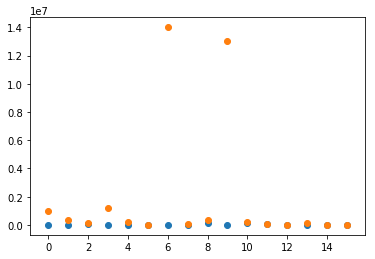

In [4]:
import matplotlib.pyplot as plt

df = report_sens.query('algo == "TSens"')
x = df['query']
y = df['sensitivity']
plt.scatter(list(range(len(y))), y)
df = report_sens.query('algo == "Elastic"')
x = df['query']
y = df['sensitivity']
plt.scatter(list(range(len(y))), y)
plt.show()

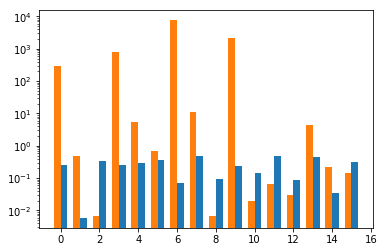

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def show_DP(algo, shift):
    width = 0.35
    df = report_DP
    df['error'] = np.absolute(df['nosy_ans'] - df['true_ans']) / df['true_ans']
    df = df.query('algo == "{algo}"'.format(algo=algo))
    y = df['error']
    plt.bar(np.arange(len(y)) + shift * width, y, width = width)
    #plt.scatter(np.arange(len(y)), y)
    
plt.yscale('log')
show_DP('TSensDP', 0.5)
show_DP('PrivateSQL', -0.5)
plt.show()